In [1]:
#importing all the necessary libraries

import numpy as np                     
import matplotlib.pyplot as plt
import os
import cv2 as cv
import random

In [78]:
#load a single image from the bacteria folder

def load_image(path):
    for img in os.listdir(bacteria_path):
        print('Image name =',img)
        image = cv.imread(os.path.join(bacteria_path, img))
        break
        
    return image

Image name = person1000_bacteria_2931.jpeg
The dimensions are 760 pixels height and 1152 pixels width
The maximum pixel value is 255.0000
The minimum pixel value is 0.0000
The mean value of the pixels is 114.5373
The standard deviation is 56.2341


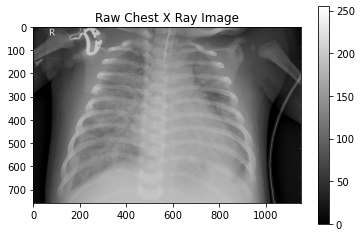

In [79]:
# Investigate a single image

bacteria_path = 'H:/All Files/Kaggle/chest_xray/train/2_BACTERIA/'

image = load_image(bacteria_path)
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions are {image.shape[0]} pixels height and {image.shape[1]} pixels width")
print(f"The maximum pixel value is {raw_image.max():.4f}")
print(f"The minimum pixel value is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f}")
print(f"The standard deviation is {raw_image.std():.4f}")

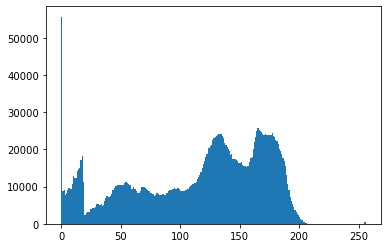

In [80]:
#plot a histogram

plt.hist(image.ravel(),256,[0,256]) 
plt.show()

In [2]:
# loading the path of the train images

path = 'H:/All Files/Kaggle/chest_xray/train/'
train = os.listdir(path)

# checking the number of files/folders in 'train'

len(train)

In [4]:
# checking the names of folders in 'train'

folders=[]
folders = [f for f in sorted(os.listdir(path))]
print(folders)

['1_NORMAL', '2_BACTERIA', '3_VIRUS']


In [7]:
# assigning the labels

labels = folders
print (f'The labels are {labels}')

# setting the size of images that we want

image_size = 256
print(f'All images to be resized into {image_size}*{image_size} pixels')

The labels are ['1_NORMAL', '2_BACTERIA', '3_VIRUS']
All images to be resized into 256*256 pixels


In [10]:
# defining a function to load images and labels together
# this function will also resize the images

def load_train(path):
    
    images = []
    
    for label in labels:
        direc = os.path.join(path, label)
        class_num = labels.index(label)
        
        for image in os.listdir(direc):
            image_read = cv.imread(os.path.join(direc,image),cv.IMREAD_GRAYSCALE)
            image_resized = cv.resize(image_read,(image_size,image_size))
            images.append([image_resized,class_num])
            
    return np.array(images)      

In [13]:
#load all the training images to train_images

train_images = load_train(path)

print(f'Shape of the training images = {train_images.shape}')

Shape of the training images = (5208, 2)


In [26]:
#loading the images and labels seperately in X and y, to be used later for training

X = []
y = []

for feature, label in train_images:
    X.append(feature)
    y.append(label)
    
print (f'Length of X = {len(X)}')
print (f'Length of y = {len(y)}')

Length of X = 5208
Length of y = 5208


Number of Normal images = 1341
Number of Bacteria images = 2530
Number of Virus images = 1337


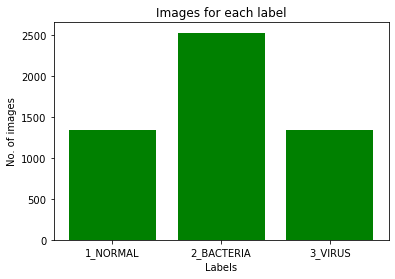

In [62]:
# checking the number of images of each class

a = 0
b = 0
c = 0

for label in y:
    if label == 0:
        a += 1
    if label == 1:
        b += 1
    if label == 2:
        c += 1
        
print (f'Number of Normal images = {a}')
print (f'Number of Bacteria images = {b}')
print (f'Number of Virus images = {c}')

# plotting the data

x_pos = [i for i, _ in enumerate(labels)]
numbers = [a,b,c]
plt.bar(x_pos,numbers,color = 'green')
plt.xlabel("Labels")
plt.ylabel("No. of images")
plt.title("Images for each label")

plt.xticks(x_pos, labels)

plt.show()

Display Random Images


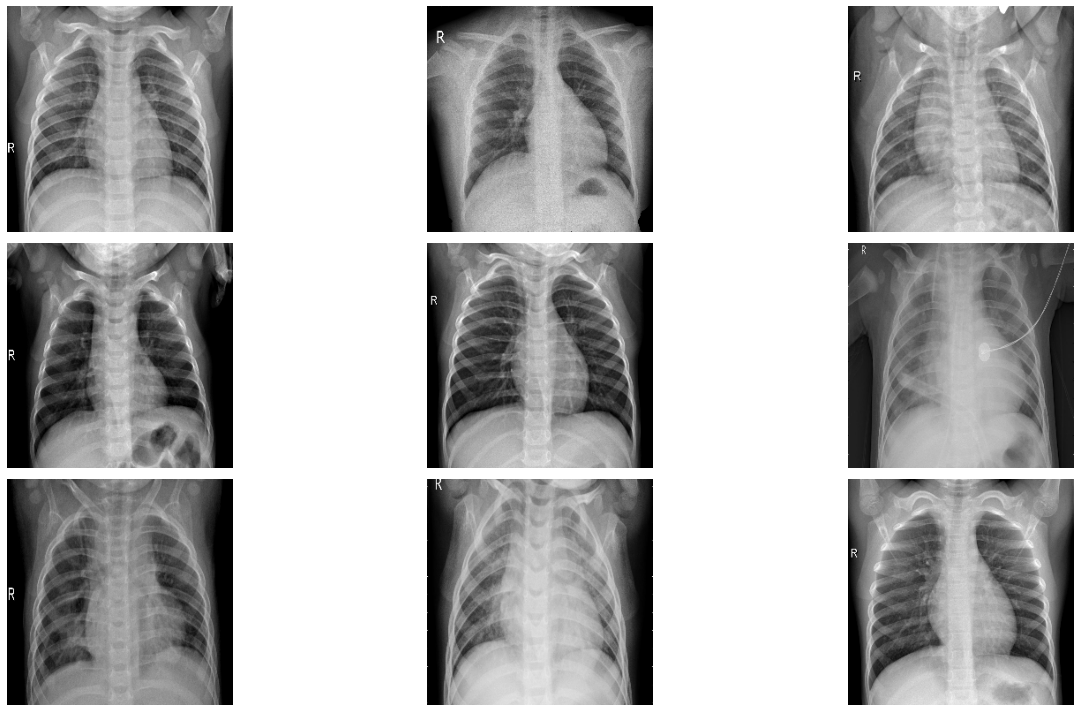

In [37]:
# Displays images 
# Extract 9 random images
print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(20,10))

for i in range(9):
    num = random.randint(0,len(X)-1)
    plt.subplot(3, 3, i + 1)
    
    plt.imshow(X[num],cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()  